In [3]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os.path
import sys
from os import path
# sns.set_theme(style="whitegrid")

In [4]:
def get_edge_features(dataset):
    nodes_info = pd.read_csv(f"{dataset}/nodeQualityFeatures.txt", sep="\t")
    nodes_info['out_homophily'] = [row['redNeighborsOutRatio'] if row['group'] == 1 else 1 - row['redNeighborsOutRatio']
                               for i, row in nodes_info.iterrows()]
    edges_scores = pd.read_csv(f"{dataset}/deletion_scores.txt")
    df = edges_scores.join(nodes_info.set_index("nodeId"), on="Source", rsuffix="source")
    df = df.join(nodes_info.set_index("nodeId"), on="Target", lsuffix="_source", rsuffix="_target")
    df = df.sort_values(axis=0, by="Score", ascending=False)
    df["red_pagerank_dif"] = df["redPagerank_target"] - df["redPagerank_source"]
    # 2 * a + 1 * b.
    # 0: blue to blue, 1: blue to red, 2: red to blue, 3 red to red
    df["edge_group"] = (2 * df["group_source"]) + df["group_target"]
    
    # To get distances ##################
    edges = [(i, j) for i,j in zip(df.Source, df.Target)]
    f = open(f"{dataset}/out_graph.txt")
    lines = f.readlines()
    f.close()
    G = nx.parse_edgelist(lines[1:], nodetype=int, create_using=nx.DiGraph)
    dist = list()
    for e in edges:
        try:
            length = len(nx.shortest_path(G, source=e[1], target=e[0])) - 1
            dist.append(length)
        except nx.NetworkXNoPath:
            dist.append(float("Inf"))
    df["Distance"] = dist
    #####################################
    
    return df
 

In [5]:
books = get_edge_features("books")
blogs = get_edge_features("blogs")
dblp = get_edge_features("dblp_genre_5")
dblpp = get_edge_features("dblp_pub_5")
twitter = get_edge_features("twitter")

# Correlation table

In [28]:
# Pearson.
# Initialization and books.
temp_cor = books.corr(method="pearson").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]
values = list()
for label, value in temp_cor.iteritems():
    values.append(str(label) + " & " + str(round(value, 2)))

# Blogs.
temp_cor = blogs.corr(method="pearson").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1

# Dblp GENDER
temp_cor = dblp.corr(method="pearson").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1
    
    

# DBLP PUBS.
temp_cor = dblpp.corr(method="pearson").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1


# Twitter.
temp_cor = twitter.corr(method="pearson").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1

# Spearman
# Books.
temp_cor = books.corr(method="spearman").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1
    
# Blogs.
temp_cor = blogs.corr(method="spearman").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1

# Dblp gender.
temp_cor = dblp.corr(method="spearman").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1

# Dblp pubs.
temp_cor = dblpp.corr(method="spearman").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1
    
# Twitter.
temp_cor = twitter.corr(method="spearman").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1

# Print latex table.
print("\\hline")
print("Metric & Books & Blogs & DBLP\_GENDER & DBLP\_PUBS & Twitter & Books & Blogs & DBLP\_GENDER & DBLP\_PUBS & Twitter \\\\")
print("\\hline")
for i in values:
    print(i + " \\\\")
    print("\\hline")

\hline
Metric & Books & Blogs & DBLP\_GENDER & DBLP\_PUBS & Twitter & Books & Blogs & DBLP\_GENDER & DBLP\_PUBS & Twitter \\
\hline
pagerank_source & -0.0 & -0.0 & 0.0 & 0.0 & -0.01 & 0.02 & -0.09 & 0.0 & -0.08 & -0.0 \\
\hline
redPagerank_source & -0.0 & -0.0 & -0.02 & -0.02 & 0.02 & 0.11 & 0.12 & -0.06 & -0.27 & 0.09 \\
\hline
group_source & -0.0 & -0.0 & -0.01 & -0.01 & 0.01 & 0.24 & 0.15 & -0.0 & -0.03 & 0.05 \\
\hline
inDegree_source & -0.0 & 0.0 & 0.0 & 0.0 & -0.0 & 0.03 & -0.05 & 0.02 & -0.07 & -0.0 \\
\hline
outDegree_source & -0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.03 & 0.01 & 0.02 & -0.07 & -0.0 \\
\hline
redNeighborsInRatio_source & -0.0 & -0.0 & -0.01 & -0.02 & 0.01 & 0.18 & 0.14 & -0.1 & -0.32 & 0.05 \\
\hline
redNeighborsOutRatio_source & -0.0 & -0.0 & -0.01 & -0.02 & 0.02 & 0.18 & 0.14 & -0.1 & -0.32 & 0.05 \\
\hline
out_homophily_source & -0.0 & 0.01 & 0.01 & 0.01 & 0.03 & -0.27 & -0.05 & 0.06 & 0.29 & 0.02 \\
\hline
pagerank_target & 0.01 & 0.02 & -0.03 & -0.08 & 0.01 & -0.11

In [109]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    ax.invert_yaxis()

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
#     ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int((im.norm(data[i, j]) > threshold) 
                                           or (im.norm(data[i, j]) < -threshold))])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

<IPython.core.display.Javascript object>


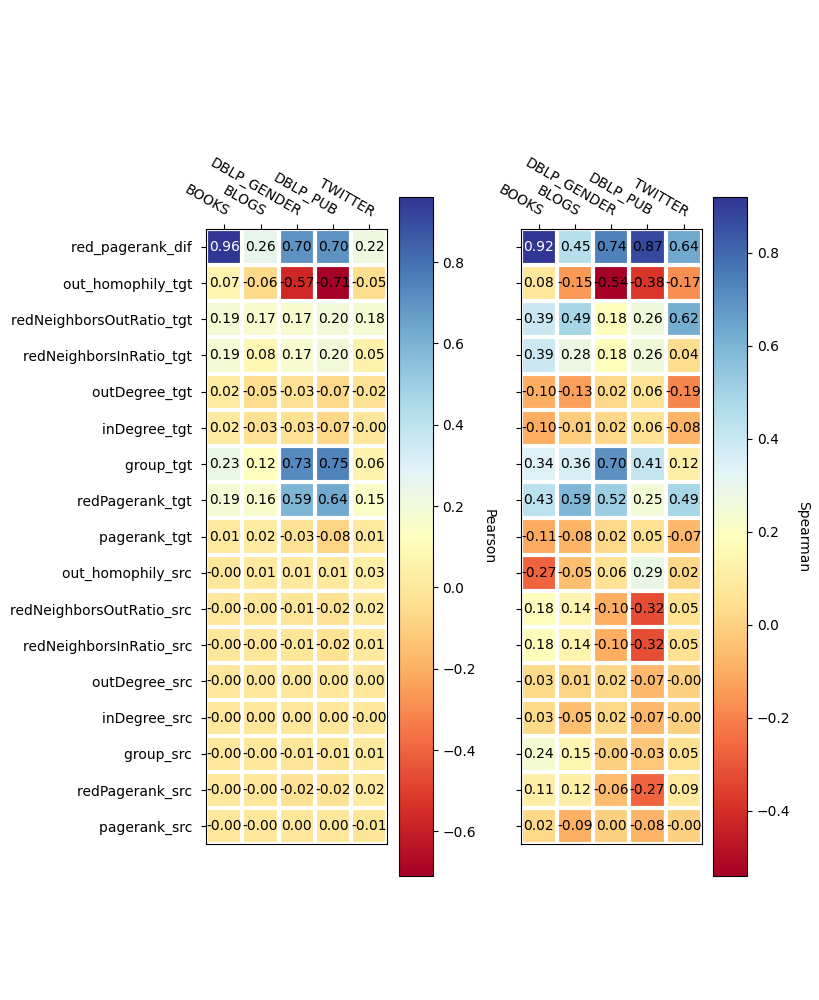

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


In [116]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
datasets = ["BOOKS", "BLOGS", "DBLP_GENDER", "DBLP_PUB", "TWITTER"]
metrics = []
cors = []
cors1 = []
for row in values:
    toks = row.split("&")
    metrics.append(toks[0].replace("source", "src").replace("target", "tgt"))
    ad = []
    ad1 = []
    for i in range(1, len(toks) - len(datasets)):
        ad.append(float(toks[i]))
    for i in range(len(toks) - len(datasets), len(toks)):
        ad1.append(float(toks[i]))
    cors.append(ad)
    cors1.append(ad1)
harvest = np.array(cors)
harvest1 = np.array(cors1)
# fig, ax = plt.subplots()
# fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8.2,10))

im, cbar = heatmap(harvest, metrics, datasets, cmap="RdYlBu", ax=ax1, cbarlabel="Pearson")
texts = annotate_heatmap(im, data=harvest, valfmt="{x:.2f}", threshold=0.9)
im1, cbar1 = heatmap(harvest1, [], datasets, cmap="RdYlBu", ax=ax2, cbarlabel="Spearman")
texts = annotate_heatmap(im1, data=harvest1, valfmt="{x:.2f}", threshold=0.9)
#  cmap="YlGnBu"
# YlGnBu

fig.tight_layout()
plt.show()
plt.savefig("figures/cor1.png", dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches='tight', pad_inches=0.1,
                frameon=None, metadata=None)

# Names

In [5]:
dblp_names = pd.read_csv("dblp_genre_5/names.txt", sep="\t")

In [15]:
dblp_best = dblpp.head(20)[["Source", "Target", "Score"]]
df_best = dblp_best.join(dblp_names.set_index("Node_id"), on="Source", rsuffix="source" )
df_best = df_best.join(dblp_names.set_index("Node_id"), on="Target", lsuffix="_Source", rsuffix="_Target")
dblp_worst = dblpp.tail(20)[["Source", "Target", "Score"]]
df_worst = dblp_worst.join(dblp_names.set_index("Node_id"), on="Source", rsuffix="source" )
df_worst = df_worst.join(dblp_names.set_index("Node_id"), on="Target", lsuffix="_Source", rsuffix="_Target")

In [16]:
df_best = df_best[["Author_Name_Source", "Author_Name_Target", "Score"]]
df_worst = df_worst[["Author_Name_Source", "Author_Name_Target", "Score"]].sort_values(axis=0, by="Score")

In [17]:
latex_table = list()
i = 0
for index, row in df_best.iterrows():
    latex_table.append(str(i + 1))
    for label, value in row.iteritems():
        value_t = round(value, 6) if type(value) is float else value
        latex_table[i] += " & " + str(value_t)
    i += 1

i = 0
for index, row in df_worst.iterrows():
    for label, value in row.iteritems():
        value_t = round(value, 6) if type(value) is float else value
        latex_table[i] += " & " + str(value_t)
    i += 1

# Print table in latex code.
print("\\hline")
print("Order & Source & Target & Score & Source & Target & Score")
print("\\hline")
for row in latex_table:
    print(row + "\\\\")
print("\\hline")

\hline
Order & Source & Target & Score & Source & Target & Score
\hline
1 & Rik Sarkar & Benedek Rozemberczki & 3.4e-05 & Doina Caragea & Cornelia Caragea & -4.9e-05\\
2 & Trong T. Nguyen & Hady W. Lauw & 3.2e-05 & Trong T. Nguyen & Hady Wirawan Lauw & -4.3e-05\\
3 & Tuan M. V. Le & Hady W. Lauw & 2.6e-05 & Hady W. Lauw & Tuan M. V. Le & -3.6e-05\\
4 & Hsuan-Tien Lin & Hong-Min Chu & 2.3e-05 & Ponnurangam Kumaraguru & Tanmoy Chakraborty 0002 & -2.9e-05\\
5 & Bamdev Mishra & Madhav Nimishakavi & 2.2e-05 & Anurag Ghosh & Ponnurangam Kumaraguru & -2.7e-05\\
6 & Arpit Merchant & Anurag Ghosh & 2e-05 & Arpit Merchant & Ponnurangam Kumaraguru & -2.7e-05\\
7 & Anurag Ghosh & Arpit Merchant & 2e-05 & Madeleine Udell & Dae Won Kim & -2.6e-05\\
8 & Rediet Abebe & Salvatore Giorgi & 1.9e-05 & Karol Wegrzycki & Piotr Sankowski & -2.5e-05\\
9 & Karsten M. Borgwardt & Bastian Rieck & 1.8e-05 & Piotr Wygocki & Piotr Sankowski & -2.5e-05\\
10 & David C. Parkes & Rediet Abebe & 1.8e-05 & Christian Bock